# **Ejercicios con Tkinter**
***

#### 1. ***Calculadora de eficiencia energética***
- Objetivo: Crear una interfaz que reciba potencia y tiempo, y calcule eficiencia.
- Componentes: Entry, Label, Button
- Extras: Mostrar resultado en un Label dinámico

In [1]:
import tkinter as tk

def calcular_eficiencia():
    potencia = float(entry_potencia.get())
    tiempo = float(entry_tiempo.get())
    eficiencia = potencia * tiempo
    resultado.config(text=f"Eficiencia: {eficiencia} J")

ventana = tk.Tk()
ventana.geometry("300x200")
ventana.title("Calculadora de Eficiencia")

tk.Label(ventana, text="Potencia (W):").pack()
entry_potencia = tk.Entry(ventana)
entry_potencia.pack()

tk.Label(ventana, text="Tiempo (s):").pack()
entry_tiempo = tk.Entry(ventana)
entry_tiempo.pack()

tk.Button(ventana, text="Calcular", command=calcular_eficiencia).pack()
resultado = tk.Label(ventana, text="")
resultado.pack()

ventana.mainloop()

### 2. ***Gestor de inventario técnico***
- Objetivo: Registrar herramientas y repuestos en una lista.
- Componentes: Listbox, Entry, Button
- Extras: Agregar, eliminar y mostrar elementos del inventario

In [2]:
import tkinter as tk

inventario = []

def agregar():
    item = entry.get()
    inventario.append(item)
    actualizar_lista()

def eliminar():
    seleccion = lista.curselection()
    if seleccion:
        inventario.pop(seleccion[0])
        actualizar_lista()

def actualizar_lista():
    lista.delete(0, tk.END)
    for item in inventario:
        lista.insert(tk.END, item)

ventana = tk.Tk()
ventana.title("Inventario Técnico")

entry = tk.Entry(ventana)
entry.pack()

tk.Button(ventana, text="Agregar", command=agregar).pack()
tk.Button(ventana, text="Eliminar", command=eliminar).pack()

lista = tk.Listbox(ventana)
lista.pack()

ventana.mainloop()


### 3. ***Simulador de turnos de producción***
- Objetivo: Seleccionar turno y mostrar datos simulados.
- Componentes: Radiobutton, Label, Button
- Extras: Usar diccionarios para almacenar datos por turno

In [ ]:
import tkinter as tk
from tkinter import messagebox

# Datos simulados por turno, almacenados en un diccionario
datos_turnos = {
    "Mañana": {"Producción": 120, "Operarios": 8, "Eficiencia": "85%"},
    "Tarde": {"Producción": 100, "Operarios": 7, "Eficiencia": "78%"},
    "Noche": {"Producción": 90, "Operarios": 6, "Eficiencia": "72%"}
}

def mostrar_datos():
    turno = turno_var.get()
    if turno:
        datos = datos_turnos[turno]
        resultado.config(text=f"Turno: {turno}\n"
                              f"Producción estimada: {datos['Producción']} unidades\n"
                              f"Operarios asignados: {datos['Operarios']}\n"
                              f"Eficiencia: {datos['Eficiencia']}")
    else:
        messagebox.showwarning("Advertencia", "Por favor selecciona un turno.")

ventana = tk.Tk()
ventana.title("Simulador de Turnos de Producción")
ventana.geometry("350x250")

turno_var = tk.StringVar()

tk.Label(ventana, text="Selecciona un turno:", font=("Arial", 12)).pack(pady=10)

for turno in datos_turnos.keys():
    tk.Radiobutton(ventana, text=turno, variable=turno_var, value=turno).pack(anchor="w")

tk.Button(ventana, text="Mostrar Datos", command=mostrar_datos, bg="lightblue").pack(pady=10)

resultado = tk.Label(ventana, text="", font=("Arial", 10), justify="left")
resultado.pack(pady=10)

ventana.mainloop()

### 4. ***Visualizador de datos con Matplotlib***
- Objetivo: Mostrar gráfico de producción semanal.
- Componentes: Canvas + integración con matplotlib
- Extras: Botón para actualizar datos desde una lista

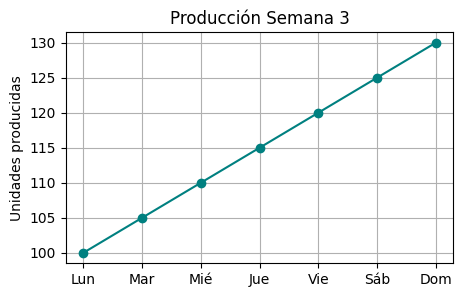

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

# Datos base simulados
datos_semanales = [
    [120, 130, 125, 140, 135, 150, 145],  # Semana 1
    [110, 115, 120, 125, 130, 135, 140],  # Semana 2
    [100, 105, 110, 115, 120, 125, 130],  # Semana 3
]

dias = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
indice_actual = 0

def actualizar_grafico():
    global indice_actual
    datos = datos_semanales[indice_actual]
    ax.clear()
    ax.plot(dias, datos, marker='o', color='teal')
    ax.set_title(f"Producción Semana {indice_actual + 1}")
    ax.set_ylabel("Unidades producidas")
    ax.grid(True)
    canvas.draw()
    indice_actual = (indice_actual + 1) % len(datos_semanales)

ventana = tk.Tk()
ventana.title("Visualizador de Producción Semanal")
ventana.geometry("500x400")

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
canvas = FigureCanvasTkAgg(fig, master=ventana)
canvas.get_tk_widget().pack(pady=20)

btn_actualizar = ttk.Button(ventana, text="Actualizar Datos", command=actualizar_grafico)
btn_actualizar.pack()

actualizar_grafico()

ventana.mainloop()